# Segmentacion de Vinos

In [1]:
%pylab
%matplotlib inline

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


## Importación de datos
Importamos los datos del vino rojo y el vino blanco

### Red

In [14]:
import pandas as pd

red = pd.read_csv('winequality-red.csv', sep = ';')
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### White

In [15]:
import pandas as pd

white = pd.read_csv('winequality-white.csv', sep = ';')
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


# Obtención de número optimo de clusters

## Evaluación de la distorsión

En este método se utiliza la dispersión promedio de los grupos que ha seleccionado el método para diferentes valores de k. La dispersión ha de disminuir a medida que aumenta el número de culsters, pero una vez que se alcanza el valor optimo la mejora se reducirá.

In [43]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def plot_distorsion(x, figure_name, max_k = 10, n_init = 10):
    meandistortions = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters = k, n_init = n_init).fit(x)
        meandistortions.append(sum(np.min(cdist(x, kmeans.cluster_centers_,
                                                'euclidean'), axis = 1))
                               / x.shape[0])

    plot(range(1, max_k), meandistortions, 'bx-')
    xlabel('k')
    ylabel('Distorsion promedio')
    title(figure_name)

### Red

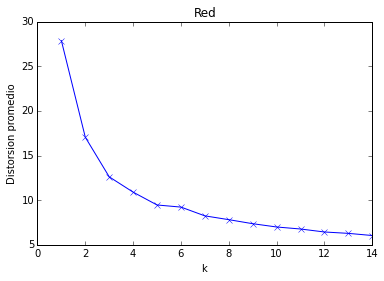

In [40]:
plot_distorsion(red, 'Red', max_k = 15, n_init = 30)

En base a la grafica, escojemos 5 como el valor a partir del cual la distorsion empieza a reducir mas lentamente.

### White

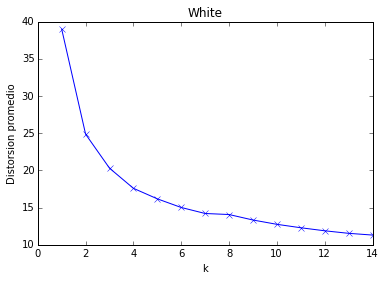

In [41]:
plot_distorsion(white, 'White', max_k = 15, n_init = 30)

En base a la grafica, escojemos 7 como el valor a partir del cual la distorsion empieza a reducir mas lentamente.

## Posicion de los centroides
Calculamos las posiciones de los centroides de ambos tipos de vinos, en base al numero de centroides determinado por la evaluacion de la distorsion.

### Red

In [42]:
kmeans = KMeans(n_clusters = 5, n_init = 30).fit(red)
pd.DataFrame(kmeans.cluster_centers_)

,0,1,2,3,4,5,6,7,8,9,10,11
0,8.226829,0.525920,0.241840,2.393792,0.086266,15.553215,39.013304,0.996677,3.329690,0.648071,10.450222,5.707317
1,7.788525,0.580710,0.258306,3.103825,0.088792,23.158470,95.322404,0.996825,3.312732,0.636885,10.104098,5.393443
2,8.241946,0.520940,0.277047,2.428356,0.094852,24.939597,62.453020,0.996931,3.322785,0.684530,10.282159,5.536913
3,8.621070,0.512960,0.287575,2.425251,0.084022,7.478261,18.489967,0.996637,3.299682,0.653796,10.642252,5.764214
4,8.057971,0.558478,0.324928,3.449275,0.089754,32.282609,139.057971,0.997148,3.234058,0.704203,9.798551,5.130435


### White

In [44]:
kmeans = KMeans(n_clusters = 7, n_init = 30).fit(white)
pd.DataFrame(kmeans.cluster_centers_)

,0,1,2,3,4,5,6,7,8,9,10,11
0,7.097368,0.304301,0.344062,7.507072,0.050747,29.314145,166.351974,0.995311,3.185576,0.499753,10.094545,5.684211
1,6.825777,0.279341,0.325777,5.610495,0.043821,29.761965,126.686398,0.993451,3.190176,0.484173,10.735276,6.014274
2,7.037821,0.308590,0.359359,10.142788,0.051798,54.854167,226.556090,0.996927,3.173526,0.525673,9.529487,5.516026
3,6.747003,0.265461,0.319619,4.239058,0.041321,26.500000,100.602284,0.992297,3.193882,0.477992,11.157422,6.101808
4,6.748659,0.254024,0.345663,7.529881,0.047665,50.187034,149.432936,0.994618,3.201803,0.486051,10.282911,5.983607
5,6.835142,0.281910,0.312429,3.192217,0.039158,15.594340,68.785377,0.991778,3.169410,0.468962,11.209984,5.745283
6,6.890328,0.280585,0.354493,9.411700,0.051440,53.691108,186.914197,0.996176,3.183541,0.510780,9.708528,5.594384
